In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('nasdaq/AppleInc.csv', index_col = 'Date', parse_dates=True)

<AxesSubplot:title={'center':'Star Bucks Stock Volume'}, xlabel='Date'>

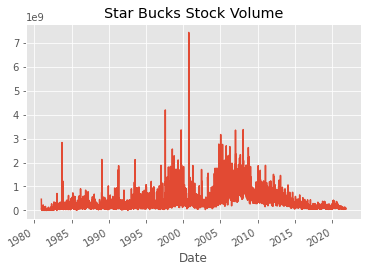

In [18]:
plt.style.use('ggplot')
df['Volume'].plot(label='CLOSE', title='Star Bucks Stock Volume')

In [19]:
X = df.iloc[:, :-1]
y = df.iloc[:, 5:6] 

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()


X_ss = ss.fit_transform(X)
y_mm = mm.fit_transform(y)

In [21]:
X_train = X_ss[:9000, :]
X_test = X_ss[9000:, :]

y_train = y_mm[:9000, :]
y_test = y_mm[9000:, :] 

In [22]:
print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (9000, 5) (9000, 1)
Testing Shape (1308, 5) (1308, 1)


In [23]:
import torch #pytorch
import torch.nn as nn
from torch.autograd import Variable 

In [24]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test)) 

In [25]:
X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))


X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

In [26]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

In [33]:
num_epochs = 10000 #1000 epochs
learning_rate = 0.001 #0.001 lr

input_size = 5 #number of features
hidden_size = 2 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes 

In [34]:
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]) #our lstm class 

In [35]:
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate) 

In [36]:
for epoch in range(num_epochs):
    outputs = lstm1.forward(X_train_tensors_final) #forward pass
    optimizer.zero_grad() #caluclate the gradient, manually setting to 0

    # obtain the loss function
    loss = criterion(outputs, y_train_tensors)

    loss.backward() #calculates the loss of the loss function

    optimizer.step() #improve from loss, i.e backprop
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.05497
Epoch: 100, loss: 0.00229
Epoch: 200, loss: 0.00216
Epoch: 300, loss: 0.00202
Epoch: 400, loss: 0.00187
Epoch: 500, loss: 0.00170
Epoch: 600, loss: 0.00155
Epoch: 700, loss: 0.00146
Epoch: 800, loss: 0.00142
Epoch: 900, loss: 0.00140
Epoch: 1000, loss: 0.00139
Epoch: 1100, loss: 0.00138
Epoch: 1200, loss: 0.00138
Epoch: 1300, loss: 0.00137
Epoch: 1400, loss: 0.00137
Epoch: 1500, loss: 0.00137
Epoch: 1600, loss: 0.00137
Epoch: 1700, loss: 0.00137
Epoch: 1800, loss: 0.00137
Epoch: 1900, loss: 0.00137
Epoch: 2000, loss: 0.00137
Epoch: 2100, loss: 0.00136
Epoch: 2200, loss: 0.00136
Epoch: 2300, loss: 0.00136
Epoch: 2400, loss: 0.00136
Epoch: 2500, loss: 0.00136
Epoch: 2600, loss: 0.00136
Epoch: 2700, loss: 0.00136
Epoch: 2800, loss: 0.00136
Epoch: 2900, loss: 0.00136
Epoch: 3000, loss: 0.00136
Epoch: 3100, loss: 0.00135
Epoch: 3200, loss: 0.00135
Epoch: 3300, loss: 0.00135
Epoch: 3400, loss: 0.00135
Epoch: 3500, loss: 0.00134
Epoch: 3600, loss: 0.00133
Epoch: 3700, 

In [37]:
df_X_ss = ss.transform(df.iloc[:, :-1]) #old transformers
df_y_mm = mm.transform(df.iloc[:, -1:]) #old transformers

df_X_ss = Variable(torch.Tensor(df_X_ss)) #converting to Tensors
df_y_mm = Variable(torch.Tensor(df_y_mm))
#reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 1, df_X_ss.shape[1])) 

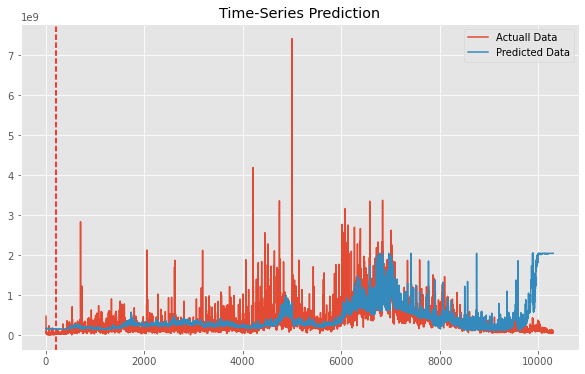

In [38]:
train_predict = lstm1(df_X_ss)#forward pass
data_predict = train_predict.data.numpy() #numpy conversion
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict) #reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=200, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Actuall Data') #actual plot
plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 